![Ontario Market](LogoOntarioMarket.png)

# Ontario Market - Segunda Entrega del Proyecto

El análisis de los clientes ayuda a modificar un producto en función a los diferentes segmentos de ellos. Por ejemplo, desarrollar estrategias de ventas enfocadas a los clientes de mayor potencial, y con productos especificos.

En la siguiente sección, iremos a través de un proyecto de ciencia de datos sobre el análisis de la personalidad del cliente con python. Aqui usaremos un conjunto de datos recopilados de una campaña de marketing, donde nuestra tarea es predecir cómo responderán los diferentes segmentos de clientes para un producto o servicio en particular.

### Diccionario de Variables
#### People
1. ID: Customer's unique identifier
1. Year_Birth: Customer's birth year
1. Education: Customer's education level
1. Marital_Status: Customer's marital status
1. Income: Customer's yearly household income
1. Kidhome: Number of children in customer's household
1. Teenhome: Number of teenagers in customer's household
1. Dt_Customer: Date of customer's enrollment with the company
1. Recency: Number of days since customer's last purchase
1. Complain: 1 if the customer complained in the last 2 years, 0 otherwise
#### Products
1. MntWines: Amount spent on wine in last 2 years
1. MntFruits: Amount spent on fruits in last 2 years
1. MntMeatProducts: Amount spent on meat in last 2 years
1. MntFishProducts: Amount spent on fish in last 2 years
1. MntSweetProducts: Amount spent on sweets in last 2 years
1. MntGoldProds: Amount spent on gold in last 2 years
#### Promotion
1. NumDealsPurchases: Number of purchases made with a discount
1. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
1. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
1. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
1. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
1. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
1. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#### Place
1. NumWebPurchases: Number of purchases made through the company’s website
1. NumCatalogPurchases: Number of purchases made using a catalogue
1. NumStorePurchases: Number of purchases made directly in stores
1. NumWebVisitsMonth: Number of visits to company’s website in the last month

### Pasos de este estudio
1. Indicación de la fuente del dataset
1. Carga de datos
1. Exploración de datos
1. Procesamiento de datos
1. Análisis exploratorio de datos
1. Preparación de datos
1. Selección, entrenamiento y evaluación del modelo

# Análisis de Datos

## 1. Fuente del dataset
https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv

## 2. Carga de Datos

In [1]:
#Importar librerias
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#Lectura de datos
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 3. Exploración de Datos

In [3]:
#Dimensiones del dataset
print(f'Este data set tiene {str(data.shape[0])} filas, y {str(data.shape[1])} columnas')

Este data set tiene 2240 filas, y 29 columnas


In [4]:
#Columnas del dataset
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
#Tipo de datos y cantidad de No Nulos por columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#Distribución de las variables numericas
data.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.2,3246.7,0.0,2828.2,5458.5,8427.8,11191.0
Year_Birth,2240.0,1968.8,12.0,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2216.0,52247.3,25173.1,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,0.4,0.5,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,0.5,0.5,0.0,0.0,0.0,1.0,2.0
Recency,2240.0,49.1,29.0,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,303.9,336.6,0.0,23.8,173.5,504.2,1493.0
MntFruits,2240.0,26.3,39.8,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2240.0,167.0,225.7,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2240.0,37.5,54.6,0.0,3.0,12.0,50.0,259.0


In [7]:
#Distribución de las variables categóricas
data.describe(include=['O']).T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


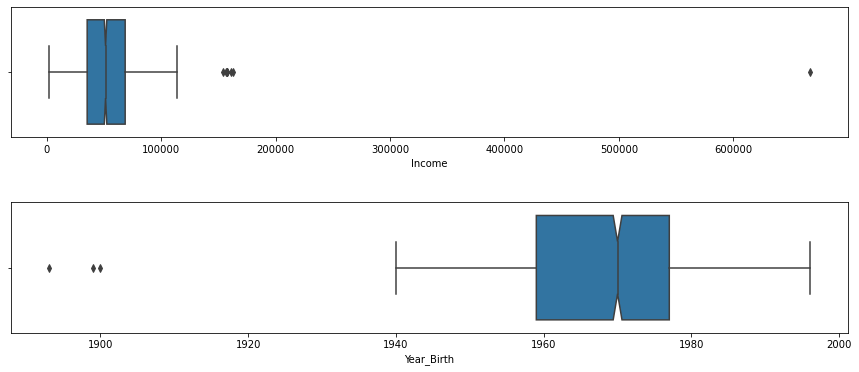

In [8]:
#Gráfica tipo 'box' para detección de outliers
fig, ax = plt.subplots(2, figsize=(15, 6))
sns.boxplot(data.Income, notch ='True', ax=ax[0])
sns.boxplot(data.Year_Birth, notch ='True', ax=ax[1])
plt.subplots_adjust(hspace=0.5)
plt.show()

## 4. Procesamiento de datos

In [9]:
#Fijar la columna "ID" como index del dataframe
data = data.set_index('ID')

In [10]:
#Se considera eliminar los datos faltantes en la columna "Income", por ser solamente 24 entradas, 1% del dataset.
data = data.dropna()

In [11]:
#Eliminación de columnas
data.drop(columns = ['Z_CostContact','Z_Revenue'], inplace=True)

In [12]:
#Calcular columna de edad "Age", a la fecha del Dataset
data['Age'] = 2014 - data.Year_Birth
data = data.drop(['Year_Birth'], axis=1)

In [13]:
#Eliminación de outliers
data = data[data.Income < 200000] #'Income' outlier (ID=9432)
data = data[data.Age < 90] #'Age' outlier (ID = 1150,7829,11004)

In [14]:
#Calcular columna de gastos total
data['TotalSpent'] = data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

In [15]:
#Convertir a datetime la columna "Dt_Customer".
data.Dt_Customer = pd.to_datetime(data.Dt_Customer, format="%d-%m-%Y")

In [16]:
#Simplificar "Education" y normalizar variables.
data.Education = data.Education.replace({'Basic':'Not Graduated','2n Cycle':'Not Graduated','Graduation':'Graduated','Master':'Graduated','PhD':'Graduated'}).map({'Not Graduated': 0, 'Graduated': 1}).astype(int)

In [17]:
#Simplificar "Marital_Status" y normalizar variables.
data.Marital_Status = data.Marital_Status.replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'}).map({'Alone': 0, 'In couple': 1}).astype(int)

In [18]:
#Renombrar columnas.
data = data.rename(columns={'NumWebPurchases': 'Web_Purchases','NumCatalogPurchases':'Catalog_Purchases','NumStorePurchases':'Store_Purchases','MntWines': 'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

## 5. Análisis exploratorio de datos

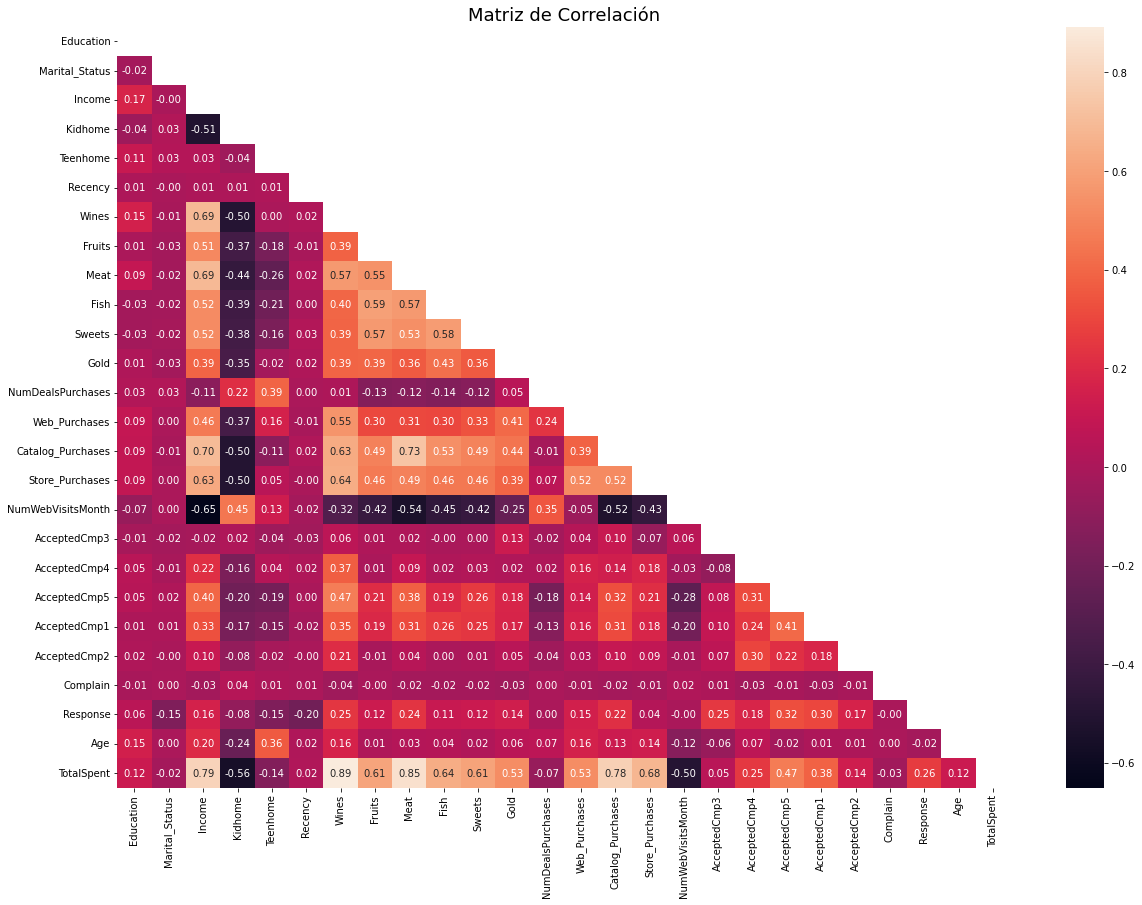

In [19]:
#Matriz de correlación por metodo "Pearson"
corr = data.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure (figsize = (20, 14))
sns.heatmap (corr, annot=True, mask=mask, fmt='.2f')
plt.title("Matriz de Correlación", fontsize=18)
plt.show()

In [20]:
corr.abs().unstack().sort_values(ascending = False)[26:65]

TotalSpent         Wines                0.892996
Wines              TotalSpent           0.892996
Meat               TotalSpent           0.845543
TotalSpent         Meat                 0.845543
Income             TotalSpent           0.792740
TotalSpent         Income               0.792740
                   Catalog_Purchases    0.780250
Catalog_Purchases  TotalSpent           0.780250
Meat               Catalog_Purchases    0.733787
Catalog_Purchases  Meat                 0.733787
                   Income               0.696589
Income             Catalog_Purchases    0.696589
Meat               Income               0.692279
Income             Meat                 0.692279
Wines              Income               0.688209
Income             Wines                0.688209
TotalSpent         Store_Purchases      0.675981
Store_Purchases    TotalSpent           0.675981
Income             NumWebVisitsMonth    0.650257
NumWebVisitsMonth  Income               0.650257
TotalSpent         F

* Clientes con alto ingreso son quienes mas gastan
* Los productos "Meat" y "Wine" son los productos con mas alto costo
* Clientes con niños y con bajo ingreso prefieren las compras en ofertas
* Las variables "Complain" y "recency" no estan relacionadas con otras

## 6. Preparación de Datos

In [21]:
#Seleccionar datos a entrenar y datos de salida
x = data[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Age', 'TotalSpent', 'Recency']]
y = data['Response']

# División de datos de entrenamiento y datos de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

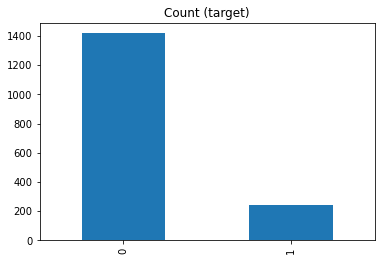

In [22]:
#Balance del set de entrenamiento
y_train.value_counts().plot (kind='bar', title='Count (target)')
plt.show()

## 7. Entrenamiento de modelos supervisados

In [23]:
#Variables de resultados
Accuracy_Test=[]
Accuracy_Train=[]
KFold_Mean=[]
KFold_Std=[]

### Árboles de decisión

In [24]:
#Instanciar el modelo
tree = DecisionTreeClassifier(max_depth=3)

In [25]:
#Entrenar el modelo
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
#Evaluación del modelo con métrica "Accuracy"
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.833634719710669


In [27]:
#Evaluación del modelo con método de validación cruzada
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.850 (0.031)


In [28]:
#Agregado al dataframe de comparación
Accuracy_Test.append(test_accuracy)
Accuracy_Train.append(train_accuracy)
KFold_Mean.append(mean(scores))
KFold_Std.append(std(scores))

### Random Forest

In [29]:
#Instanciar el modelo
RandForest = RandomForestClassifier()

In [30]:
#Entrenar el modelo
RandForest.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
#Evaluación del modelo con métrica "Accuracy"
y_train_pred = RandForest.predict(x_train)
y_test_pred = RandForest.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.8390596745027125


In [32]:
#Evaluación del modelo con método de validación cruzada
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier()
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.863 (0.031)


In [33]:
#Agregado al dataframe de comparación
Accuracy_Test.append(test_accuracy)
Accuracy_Train.append(train_accuracy)
KFold_Mean.append(mean(scores))
KFold_Std.append(std(scores))

### KNN

In [34]:
#Instanciar el modelo
knn = KNeighborsClassifier()

In [35]:
#Entrenar el modelo
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
#Evaluación del modelo con métrica "Accuracy"
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.8173598553345389


In [37]:
#Evaluación del modelo con método de validación cruzada
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = KNeighborsClassifier()
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.844 (0.030)


In [38]:
#Agregado al dataframe de comparación
Accuracy_Test.append(test_accuracy)
Accuracy_Train.append(train_accuracy)
KFold_Mean.append(mean(scores))
KFold_Std.append(std(scores))

### Regresión logística

In [39]:
#Instanciar el modelo
LR = LogisticRegression()

In [40]:
#Entrenar el modelo
LR.fit(x_train,y_train)

LogisticRegression()

In [41]:
#Evaluación del modelo con métrica "Accuracy"
y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.8426763110307414


In [42]:
#Evaluación del modelo con método de validación cruzada
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.858 (0.019)


In [43]:
#Agregado al dataframe de comparación
Accuracy_Test.append(test_accuracy)
Accuracy_Train.append(train_accuracy)
KFold_Mean.append(mean(scores))
KFold_Std.append(std(scores))

### Máquina de vector soporte

In [44]:
#Instanciar el modelo
SVC = SVC(C=10)

In [45]:
#Entrenar el modelo
SVC.fit(x_train,y_train)

SVC(C=10)

In [46]:
#Evaluación del modelo
y_train_pred = SVC.predict(x_train)
y_test_pred = SVC.predict(x_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.833634719710669


In [47]:
#Evaluación del modelo con método de validación cruzada
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, x, y, cv=10)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.810 (0.024)


In [48]:
#Agregado al dataframe de comparación
Accuracy_Test.append(test_accuracy)
Accuracy_Train.append(train_accuracy)
KFold_Mean.append(mean(scores))
KFold_Std.append(std(scores))

### Evaluación de modelos

In [49]:
#Dataframe de comparación
modelos_supervisados = pd.DataFrame(Accuracy_Test,index=['tree','RF','kNN','LogReg','SVM'], columns=['Accuracy_Test'])
modelos_supervisados['Accuracy_Train']=Accuracy_Train
modelos_supervisados['KFold_Mean']=KFold_Mean
modelos_supervisados['KFold_Std']=KFold_Std
modelos_supervisados

,Accuracy_Test,Accuracy_Train,KFold_Mean,KFold_Std
tree,0.833635,0.870404,0.849888,0.030958
RF,0.839060,0.992164,0.863454,0.030661
kNN,0.817360,0.880048,0.844012,0.029678
LogReg,0.842676,0.852923,0.858489,0.019161
SVM,0.833635,0.854732,0.809698,0.023668


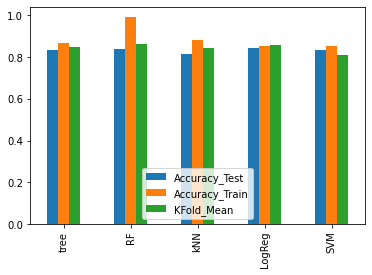

In [50]:
axes = modelos_supervisados[['Accuracy_Test','Accuracy_Train','KFold_Mean']].plot.bar()